In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Load the dataset

df = pd.read_csv("/home/inventor/Datasets/Boston house/boston.csv")

In [75]:
df.shape

(506, 14)

In [76]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [77]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [80]:
# Change the datatype

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [81]:
df["ZN"] = df["ZN"].astype("int64")
df["TAX"] = df["TAX"].astype("int64")

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    int64  
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [84]:
class PCA_Custom():

    def __init__(self, n_components):

        self.n_components = n_components
        self.variance = None
        self.components = None
        self.explained_variance_ratio = None
    
    def fit(self, X):

        # Center the data
        X_mean = X.mean()

        X_centered = X - X_mean

        # Calculate the Cov Matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Find the Eigen Value and EigenVector

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort the Eigenvalues and eigenvector

        sort_indices = np.argsort(eigenvalues)[::-1]

        eigenvalues = eigenvalues[sort_indices]
        eigenvectors = eigenvectors[:, sort_indices]

        # Top component Analysis

        self.variance = eigenvalues[:self.n_components]
        self.components = eigenvectors[:, :self.n_components]

        total_variance = np.sum(self.variance)
        self.explained_variance_ratio = eigenvalues / total_variance

    
    def transform(self, X):

        X_centered = X - X.mean()

        return np.dot(X_centered, self.components)

    def fit_transform(self, X):

        self.fit(X)
        return self.transform(X)

In [85]:
pca_c = PCA_Custom(n_components=5)

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("MEDV", axis=1), df["MEDV"], test_size=0.2, random_state=42) 

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [88]:
X_train = pca_c.fit_transform(X_train)
X_test = pca_c.transform(X_test)

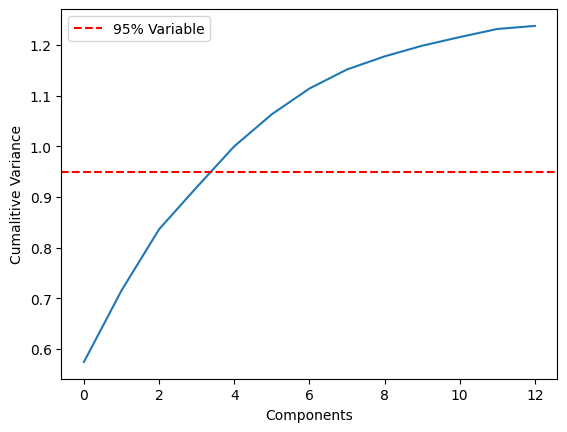

In [89]:
cum = np.cumsum(pca_c.explained_variance_ratio)

threshold = 0.95

plt.plot(cum)
plt.axhline(y=threshold, color="r", linestyle="--", label="95% Variable")
plt.xlabel("Components")
plt.ylabel("Cumalitive Variance")
plt.legend()
plt.show()

In [90]:
class Elastic_NET():

    def __init__(self, learning_rate, epochs, alpha, l1_ratio):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train) + np.dot(self.alpha, (np.dot(self.l1_ratio, np.sign(self.coef_)) + np.dot((1 - self.l1_ratio), self.coef_)))

            self.coef_ = self.coef_ - (self.lr * coef_slope)

        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_)
        return y_pred



In [106]:
elastic = Elastic_NET(learning_rate=0.00001, epochs=2000, alpha=0.01, l1_ratio=0.5)

In [107]:
elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)

Coef_: [22.78929621 -2.26686257  2.73700917 -3.30534624 -0.30975251  2.47612569]


In [108]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)

elastic_net.fit(X_train, y_train)

y_pred_sk = elastic_net.predict(X_test)

In [109]:
elastic_net.coef_

array([-2.26416148,  2.72449308, -3.28862887, -0.3025743 ,  2.45837794])

In [110]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(y_test, y_pred_sk)

r2_score_c = r2_score(y_test, y_pred)

r2_score_sk, r2_score_c

(0.5909544546000682, 0.5899677267086018)